In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/content/drive/MyDrive/Data/iris_csv.csv"
iris = pd.read_csv(filepath)
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
setosa_petal_length = iris.loc[iris['class'] == 'Iris-setosa']['petallength']
mu = setosa_petal_length.mean()
sigma = setosa_petal_length.std()

print(mu, sigma)

1.464 0.1735111594364455


[0.06437413 0.25463915 0.7225775  1.47092033 2.14802496 2.25027171
 1.69112635 0.91172238 0.35261001 0.09783001]
9.964096531568872


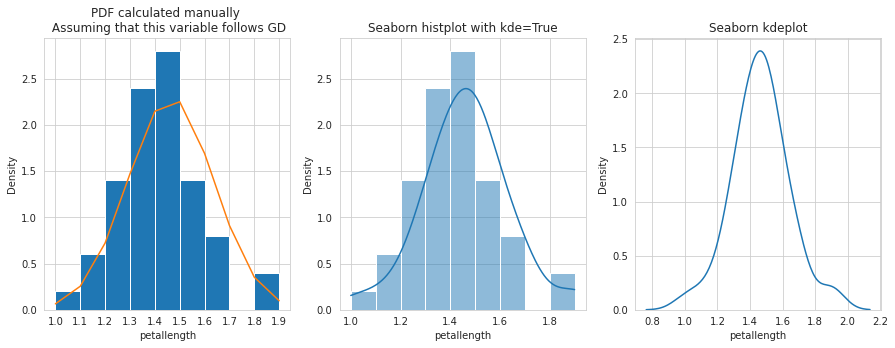

In [4]:
bin_width = 0.1
bins = np.arange(min(setosa_petal_length), max(setosa_petal_length)+bin_width, bin_width)

counts, bins, ignored = plt.hist(setosa_petal_length, bins, density=True)

pdf = 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) )
print(pdf)
print(sum(pdf))

plt.close()

plt.figure(num=1, figsize=[15, 5])
sns.set_style("whitegrid")

plt.subplot(131)
plt.hist(setosa_petal_length, bins, density=True, )
plt.plot(bins, pdf)
plt.xticks(bins)
plt.xlabel("petallength")
plt.ylabel("Density")
plt.title("PDF calculated manually \n Assuming that this variable follows GD")

plt.subplot(132)
sns.histplot(setosa_petal_length, bins=bins, kde = True, stat="density")
plt.title("Seaborn histplot with kde=True")

plt.subplot(133)
sns.kdeplot(setosa_petal_length)
plt.title("Seaborn kdeplot")

plt.show()

In [5]:
cdf = np.cumsum(pdf)/sum(pdf)
cdf

array([0.00646061, 0.03201628, 0.10453439, 0.25215644, 0.46773293,
       0.69357094, 0.86329293, 0.95479369, 0.99018175, 1.        ])

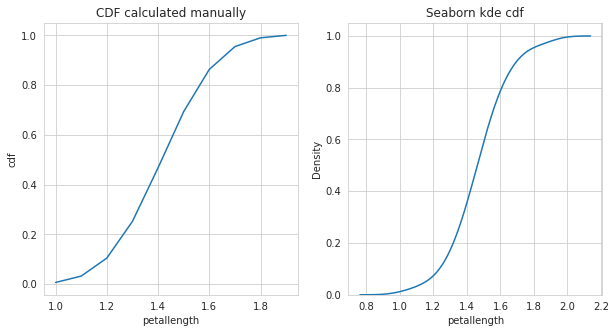

In [6]:
plt.close()

plt.figure(num=2, figsize=[10,5])

plt.subplot(121)
plt.plot(bins, cdf)
plt.xlabel("petallength")
plt.ylabel("cdf")
plt.title("CDF calculated manually")

plt.subplot(122)
sns.kdeplot(setosa_petal_length, cumulative=True)
plt.title("Seaborn kde cdf")

plt.show()